<a href="https://colab.research.google.com/github/CWILHELM9/Data-analysis/blob/main/Prediccion_de_adjudicaciones_de_compras_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
from pickle import STRING
COMPRAS = pd.read_excel("/content/drive/MyDrive/Predicciones de compras/Procesos de adquisicion en curso y cerrados.xlsx", dtype=str)
COMPRAS.sample(10)
#TOMA UNA MUESTRA AL AZAR

,Tipo_de_tramite,Secretaria,Subsecretaria,Direccion_General,Direccion,Programa,Numero de Programa,presupuesto año,Presupuesto anual (Devengado en mill $),Nombre_del_proceso,...,Fuente_de_financiamiento,Num_de_exp,Fecha_caratulacion,nro_proceso,Estado_proceso,Adjudicado,Días desde último movimiento,Días desde inicio,Importe total en pesos,Dias de procesamiento
757,GENE00001 - Licitación privada,SGA#MS,SGA#MS,DGA#MS,DGO#MS,1.0.0.3 Actividades de Apoyo Administrativo,1,2023,28954.97157898,Adquisición de elementos de cocina para los Ja...,...,1,EX-2022-105281558-APN-DCYC#MS,2022-10-03 15:16:00,80-0017-LPR22,Adjudicado,1,132.47986111111095,835.363888888889,2428182.69,455
66,GENE00003 - Compulsa abreviada,SCS#MS,SSGSEI#MS,DNES#MS,DNES#MS,26.0.0.1 Cobertura de Emergencias Sanitarias,26,2022,216.4395303,Adquisición de equipamiento básico de oficina ...,...,2,EX-2021-116069055-APN-DGPFE#MS,2021-11-30 11:02:00,80/12-0009-CDP21,En Evaluacion,0,719.3000000000029,1142.540277777778,4547900,0
135,GENE00034 - Autorización anticipo de fondos,SAS#MS,SSES#MS,DNAIENT#MS,DNAIENT#MS,"24.0.0.47 Coordinación, Prevención y Control d...",24,2022,220.99382777,Reparación Eléctrica Oficinas Av. Julio A. Roc...,...,1,EX-2022-9351868-APN-SGA#MS,2022-01-31 14:33:00,NO_COMPRAR,Adjudicado,1,961.5888888888876,1080.393750000003,102538.78,26
1437,GENE00003 - Compulsa abreviada,SAS#MS,Sin información,DNSSYR#MS,NaN,25.0.0.41 Desarrollo de la Salud Sexual y la P...,25,2024,2906.46434646,Solicitud de Adquisición de DIU Tipo T y DIU T...,...,1,EX-2023-132758272-APN-DCYC#MS,2023-11-07 12:58:00,80-0097-CDI23,Adjudicado,1,169.24236111110804,435.4597222222219,168698560,251
1193,GENE00000 - Licitación pública,UGA#MS,UGA#MS,DNRIEI#MS,DNRIEI#MS,9.0.0.4 Coordinación Relaciones Institucionales,9,2023,845.71057118,contratación de servicio de producción integra...,...,1,EX-2023-62167398-APN-DCYC#MS,2023-05-31 14:40:00,80-0027-LPU23,Adjudicado,1,454.4291666666686,595.3888888888905,38187348.26,117
992,GENE00000 - Licitación pública,SAS#MS,SSMEIE#MS,DNMYTS#MS,DNMYTS#MS,29.0.0.46 Banco de Drogas Oncológicas y Especi...,29,2023,32355.45833063,Adquisición de Medicamentos Oncológicos - CBDE...,...,1,EX-2023-19386365-APN-DCYC#MS,2023-02-22 14:30:00,80-0006-LPU23,Adjudicado,1,324.2993055555562,693.3958333333358,341231205.36,NaN
340,GENE00258 - Procedimiento de compras,SAS#MS,SSMEIE#MS,DNSI#MS,DNSI#MS,16.0.0.0 Apoyo al Desarrollo de la Atención Mé...,16,2022,125.15344116,Continuidad Servicio de Horas Especializadas e...,...,2,EX-2022-40058306-APN-SGA#MS,2022-04-25 14:07:00,NO_COMPRAR,Inicial,0,985.2451388888876,996.4118055555591,912135360,NaN
498,GENE00258 - Procedimiento de compras,SES#MS,SES#MS,DNFSP#MS,DNFSP#MS,47.0.0.41 Desarrollo de Seguros Públicos de Sa...,47,2023,29849.54756287,Contratación- “Desarrollo de un proceso de eva...,...,2,EX-2022-78870244-APN-SGA#MS,2022-08-01 13:00:00,NO_COMPRAR,Publicado,0,464.34999999999854,898.4583333333358,113771219.32,NaN
103,GENE00258 - Procedimiento de compras,SAS#MS,SSMEIE#MS,DNMYTS#MS,DNMYTS#MS,29.0.0.45 Provisión de Medicamentos Esenciales...,29,2022,14165.44183245,Adquisición de Medicamentos p/ Salud Mental - ...,...,1,EX-2022-640013-APN-SGA#MS,2022-01-04 10:05:00,NO_COMPRAR,inicial,0,1062.3444444444467,1107.5798611111095,183414000,NaN
17,GENE00258 - Procedimiento de compras,SGA#MS,Sin información,DGRRHH#MS,NaN,1.0.0.3 Actividades de Apoyo Administrativo,1,2022,NaN,Contratación seguro de accidentes personales c...,...,1,EX-2021-107237570-APN-SGA#MS,2021-11-05 15:36:00,NO_COMPRAR,Inicial,0,1076.4513888888905,1167.3499999999985,982951.2,NaN


In [ ]:
COMPRAS = COMPRAS.drop(['Tipo_de_tramite', 'Num_de_exp', 'Tipo_de_proceso', 'Clase', 'Secretaria', 'Nombre_del_proceso', 'Subsecretaria', 'Direccion_General', 'Direccion', 'Días desde último movimiento', 'nro_proceso', 'Fecha_caratulacion'], axis='columns')

In [ ]:
print(COMPRAS.columns)

Index(['Programa', 'Numero de Programa', 'presupuesto año',
       'Presupuesto anual (Devengado en mill $)', 'Fuente_de_financiamiento',
       'Estado_proceso', 'Adjudicado', ' Días desde inicio ',
       'Importe total en pesos', 'Dias de procesamiento'],
      dtype='object')


In [ ]:
correlacion1 = COMPRAS["Adjudicado"].corr(COMPRAS["Fuente_de_financiamiento"]) ##Insignificante
correlacion2 = COMPRAS["Adjudicado"].corr(COMPRAS["Numero de Programa"])##Insignificante
correlacion3 = COMPRAS["Adjudicado"].corr(COMPRAS["presupuesto año"]) ##Relacion negativas del 33%
correlacion4 = COMPRAS["Adjudicado"].corr(COMPRAS["Importe total en pesos"])##Insignificante
correlacion5 = COMPRAS["Adjudicado"].corr(COMPRAS["Presupuesto anual (Devengado en mill $)"])##Insignificante
correlacion6 = COMPRAS["Adjudicado"].corr(COMPRAS["Dias de procesamiento"]) #Relacion positiva del 50%
correlacion7 = COMPRAS["Adjudicado"].corr(COMPRAS[" Días desde inicio "]) #Relación positiva del 42%

print("La correlación entre la adjudicacion de los procesos de compras y la fuente de financiamiento es: ", correlacion1)
print("La correlación entre la adjudicacion de los procesos de compras y el programa es: ", correlacion2)
print("La correlación entre la adjudicacion de los procesos de compras y el año del presupuesto es: ", correlacion3)
print("La correlación entre la adjudicacion de los procesos de compras y el importe es: ", correlacion4)
print("La correlación entre la adjudicacion de los procesos de compras y el presupuesto anual es: ", correlacion5)
print("La correlación entre la adjudicacion de los procesos de compras y los dias de procesamiento es: ", correlacion6)
print("La correlación entre la adjudicacion de los procesos de compras y los dias trasncurridos desde el inicio del proceso es: ", correlacion7)

La correlación entre la adjudicacion de los procesos de compras y la fuente de financiamiento es:  -0.07419757701355074
La correlación entre la adjudicacion de los procesos de compras y el programa es:  -0.030703859755635953
La correlación entre la adjudicacion de los procesos de compras y el año del presupuesto es:  -0.3344122449641889
La correlación entre la adjudicacion de los procesos de compras y el importe es:  -0.044883583096401995
La correlación entre la adjudicacion de los procesos de compras y el presupuesto anual es:  -0.16806013000789624
La correlación entre la adjudicacion de los procesos de compras y los dias de procesamiento es:  0.496991071615016
La correlación entre la adjudicacion de los procesos de compras y los dias trasncurridos desde el inicio del proceso es:  0.418666582351852


In [ ]:
# Eliminar las filas con datos nulos
COMPRAS = COMPRAS.dropna()
COMPRAS.head(10)

,Programa,Numero de Programa,presupuesto año,Presupuesto anual (Devengado en mill $),Fuente_de_financiamiento,Estado_proceso,Adjudicado,Días desde inicio,Importe total en pesos,Dias de procesamiento
0,16.0.0.0 Apoyo al Desarrollo de la Atención Mé...,16,2022,125.15344116,2,Publicado,0,1461.5062499999985,912135360,496
2,1.0.0.3 Actividades de Apoyo Administrativo,1,2022,4948.87174345,1,Adjudicado,1,1316.4986111111139,755508.86,427
3,29.0.0.7 Tratamientos para Patologías Especial...,29,2022,14165.44183245,1,Disponible Para Adjudicar,0,1234.2715277777752,1811364555,549
6,1.03,1,2022,4948.87174345,1,En apertura,0,1178.3791666666657,42623504,0
13,42.10,42,2022,370.96928031,1,Adjudicado,1,1167.5888888888876,435872,21
15,17.0.0.41 Coordinacion y Monitoreo en los Curs...,17,2022,2868.94956141,2,En apertura,0,1167.4680555555533,390000000,0
29,45,45,2022,14474.33025339,2,En apertura,0,1157.2326388888905,198288345,0
36,17.0.0.8 Acciones vinculadas con el Programa 1...,17,2022,2868.94956141,1,Adjudicado,1,1153.3041666666686,1676132.12,13
37,37.7,37,2022,1460.13784846,1,Adjudicado,1,1149.3555555555577,113653200,174
58,25.41,25,2022,3662.19799384,1,En Evaluacion,0,1146.3145833333328,42814580.3,-102


In [ ]:
# @title presupuesto año vs Tipo_de_proceso

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(COMPRAS['presupuesto año'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(COMPRAS, x='Tipo_de_proceso', y='presupuesto año', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ValueError: Could not interpret value `Tipo_de_proceso` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x480 with 0 Axes>

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=COMPRAS)

MessageError: Error: credential propagation was unsuccessful

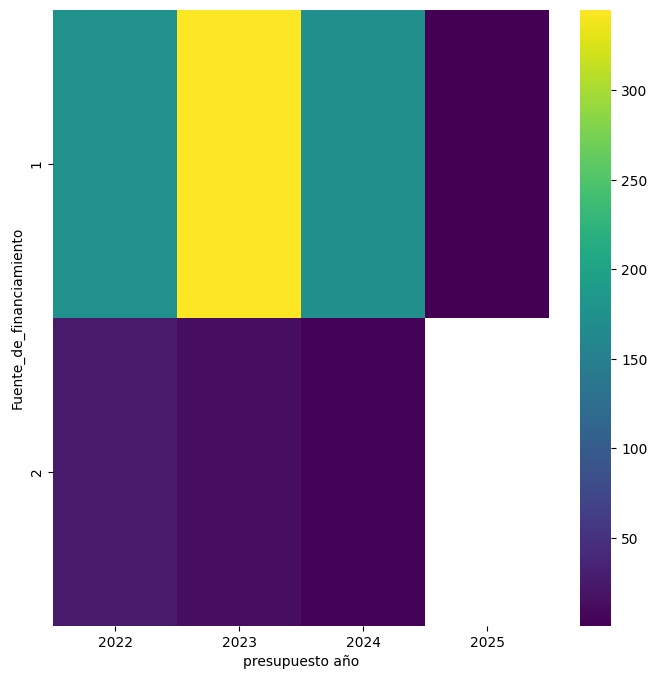

In [ ]:
# @title presupuesto año vs Fuente_de_financiamiento

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fuente_de_financiamiento'].value_counts()
    for x_label, grp in COMPRAS.groupby('presupuesto año')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('presupuesto año')
_ = plt.ylabel('Fuente_de_financiamiento')

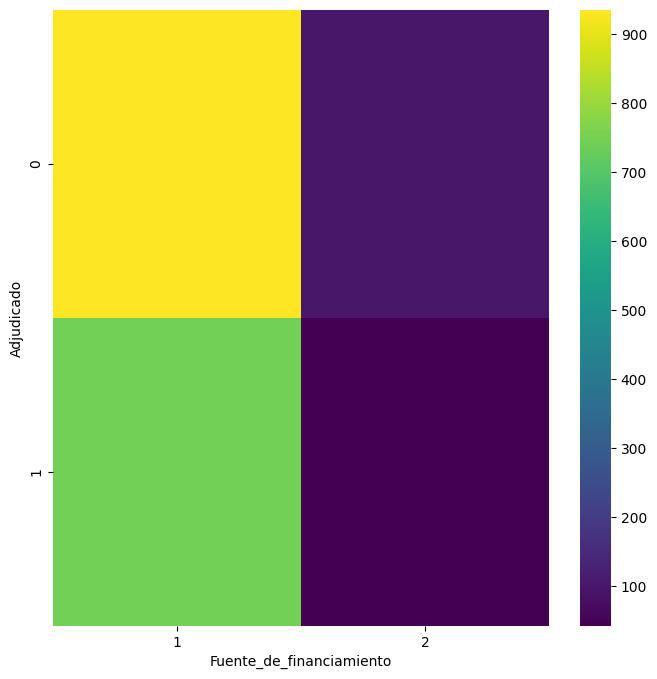

In [ ]:
# @title Fuente_de_financiamiento vs Adjudicado

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Adjudicado'].value_counts()
    for x_label, grp in COMPRAS.groupby('Fuente_de_financiamiento')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fuente_de_financiamiento')
_ = plt.ylabel('Adjudicado')

# #Muestra que hay una tendencia a que se adjudiquen los procesos con
# financiamiento externo, por sobre las compras financiadas mediante el tesoro
# nacional.

In [ ]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
COMPRAS['Programa'] = label_encoding.fit_transform(COMPRAS['Programa'].astype(str))
#COMPRAS['Tipo_de_proceso'] = label_encoding.fit_transform(COMPRAS['Tipo_de_proceso'].astype(str))
#COMPRAS['Estado_proceso'] = label_encoding.fit_transform(COMPRAS['Estado_proceso'].astype(str))
#COMPRAS['Clase'] = label_encoding.fit_transform(COMPRAS['Clase'].astype(str))
COMPRAS.head()

#CONVERTIR MAS DE UNA COLUMNA EN DUMMY.

,Programa,Numero de Programa,presupuesto año,Presupuesto anual (Devengado en mill $),Fuente_de_financiamiento,Estado_proceso,Adjudicado,Días desde inicio,Importe total en pesos,Dias de procesamiento
0,4,16,2022,125.15344116,2,Publicado,0,1461.5062499999985,912135360,496
2,2,1,2022,4948.87174345,1,Adjudicado,1,1316.4986111111139,755508.86,427
3,40,29,2022,14165.44183245,1,Disponible Para Adjudicar,0,1234.2715277777752,1811364555,549
6,3,1,2022,4948.87174345,1,En apertura,0,1178.3791666666657,42623504,0
13,56,42,2022,370.96928031,1,Adjudicado,1,1167.5888888888876,435872,21


In [ ]:
numeric_values = label_encoding.classes_
print(numeric_values)

['1.0.0.0 Actividades Centrales'
 '1.0.0.1 Formulación y Conducción de la Política Sectorial'
 '1.0.0.3 Actividades de Apoyo Administrativo' '1.03'
 '16.0.0.0 Apoyo al Desarrollo de la Atención Médica'
 '16.0.0.12 Acciones de Salud Digital - Telesalud'
 '16.0.0.49 Implementación de Sistemas de Información Sanitaria' '16.49'
 '17.0.0.41 Coordinacion y Monitoreo en los Cursos de Vida'
 '17.0.0.42 Acciones de Nutrición (NNA)'
 '17.0.0.43 Acciones en Salud Perinatal  (PPG) (NNA)'
 '17.0.0.44 Salud Infantil (NNA)'
 '17.0.0.45 Salud Integral en la Adolescencia (PPG) (NNA)'
 '17.0.0.8 Acciones vinculadas con el Programa 1000 Días'
 '17.0.0.9 Apoyo a la Reproducción Médicamente Asistida (PPG)' '17.43'
 '18.0.0.41 Formación de Recursos Humanos Sanitarios y Asistenciales'
 '18.0.0.5 Salud de los Trabajadores y Trabajadoras'
 '20.0.0.0 Prevención y Control de Enfermedades Transmisible e Inmunoprevenibles'
 '20.0.0.13 Control de Enfermedades Transmisibles'
 '20.0.0.43 Normatización, Suministro y S

In [ ]:
# Crea variables ficticias para la columna 'Estado_proceso'
COMPRAS = pd.get_dummies(COMPRAS, columns=['Estado_proceso'])

In [ ]:
# Divide los datos en características y objetivo
X_features = COMPRAS.drop('Adjudicado', axis='columns')
Y_target = COMPRAS['Adjudicado']

print(X_features.head(10))

print(Y_target.head(10))

    Programa Numero de Programa presupuesto año  \
0          4                 16            2022   
2          2                  1            2022   
3         40                 29            2022   
6          3                  1            2022   
13        56                 42            2022   
15         8                 17            2022   
29        57                 45            2022   
36        13                 17            2022   
37        48                 37            2022   
58        32                 25            2022   

   Presupuesto anual (Devengado en mill $) Fuente_de_financiamiento  \
0                             125.15344116                        2   
2                            4948.87174345                        1   
3                           14165.44183245                        1   
6                            4948.87174345                        1   
13                            370.96928031                        1   
15          

In [ ]:
from sklearn.model_selection import train_test_split
# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.15, stratify=Y_target)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crea y ajusta un modelo de regresión logística
# Parámetros:
#   penalty: Especifica la norma de regularización utilizada en el modelo (valor por defecto: 'l2')
#   C: Inverso de la fuerza de regularización; valores más pequeños especifican una regularización más fuerte (valor por defecto: 1.0)
#   solver: Algoritmo utilizado para optimizar el problema (valor por defecto: 'liblinear')
logistic_model = LogisticRegression(penalty='l2', solver='liblinear').fit(x_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = logistic_model.predict(x_test)

# Crea un DataFrame con las etiquetas reales y predichas
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
print("Tabla de resultados")
print(pred_results.head())

print("Tabla de contingencia:")
# Crea una tabla de contingencia para evaluar el rendimiento del modelo
COMPRAS_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

print(COMPRAS_crosstab)

Tabla de resultados
      y_test  y_pred
1769       0       1
668        1       1
678        1       1
300        1       1
70         0       1
Tabla de contingencia:
y_test   0   1
y_pred        
1       37  73


In [ ]:
from sklearn.linear_model import LogisticRegression

# Crea y ajusta un modelo de regresión logística
# Parámetros:
#   penalty: Especifica la norma de regularización utilizada en el modelo (valor por defecto: 'l2')
#   C: Inverso de la fuerza de regularización; valores más pequeños especifican una regularización más fuerte (valor por defecto: 1.0)
#   solver: Algoritmo utilizado para optimizar el problema (valor por defecto: 'liblinear')
logistic_model = LogisticRegression(penalty='l2', solver='liblinear').fit(x_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = logistic_model.predict(x_test)

In [ ]:
# Divide los datos en características y objetivo
X_features = COMPRAS.drop('Adjudicado', axis='columns')
# Convert 'Adjudicado' column to numeric type, mapping '0' to 0 and '1' to 1
Y_target = COMPRAS['Adjudicado'].map({'0': 0, '1': 1})

print(X_features.head(10))

print(Y_target.head(10))

    Programa Numero de Programa presupuesto año  \
0          4                 16            2022   
2          2                  1            2022   
3         40                 29            2022   
6          3                  1            2022   
13        56                 42            2022   
15         8                 17            2022   
29        57                 45            2022   
36        13                 17            2022   
37        48                 37            2022   
58        32                 25            2022   

   Presupuesto anual (Devengado en mill $) Fuente_de_financiamiento  \
0                             125.15344116                        2   
2                            4948.87174345                        1   
3                           14165.44183245                        1   
6                            4948.87174345                        1   
13                            370.96928031                        1   
15          

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Calcula la precisión, la cobertura y el recall del modelo
acc = accuracy_score(y_test, y_pred)  # Accuracy = (Número de predicciones correctas) / (Número total de instancias)
prec = precision_score(y_test, y_pred)  # Precisión = (Verdaderos Positivos) / (Verdaderos Positivos + Falsos Positivos)
recall = recall_score(y_test, y_pred) # Cobertura = (Verdaderos Positivos) / (Verdaderos Positivos + Falsos Negativos)

# Imprime los resultados de precisión, cobertura y recall
print("accuracy_score: ", acc)
print("precision_score: ", prec)
print("recall_score: ", recall)

accuracy_score:  0.6636363636363637
precision_score:  0.6636363636363637
recall_score:  1.0
